In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import seaborn as sns

In [4]:
df = pd.read_csv("D:\\abc.csv");
df=df.rename(columns = {'enrolment agency':'Agency',\
                        'Aadhaar generated':'Generated',\
                        'Enrolment Rejected':'Rejected',\
                        'Residents providing email':'Email',\
                        'Residents providing mobile number':'Mobile' ,\
                        'Sub District':'S_District'})
df.loc[df['Generated']>0,'Generated'] = 1
df.loc[df['Rejected']>0,'Rejected'] = 1
df.loc[df['Mobile']>0,'Mobile'] = 1
df['Gender'] = df['Gender'].map( {'F': 0, 'M': 1,'T': 2} ).astype(int)
df.loc[df['Age']==0 ,'Age'] = np.NAN
print('Number of states for which data exists: ',len(df['State'].unique()))
df.head(5)

C:\Users\Sarthak\AppData\Local\Programs\Python\Python36\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
Number of states for which data exists:  37


,Registrar,Enrolment Agency,State,District,S_District,Pin Code,Gender,Age,Generated,Rejected,Email,Mobile
0,Allahabad Bank,A-Onerealtors Pvt Ltd,Uttar Pradesh,Allahabad,Meja,212303,0,7.0,1,0,0,1
1,Allahabad Bank,Asha Security Guard Services,Uttar Pradesh,Sonbhadra,Robertsganj,231213,1,8.0,1,0,0,0
2,Allahabad Bank,SGS INDIA PVT LTD,Uttar Pradesh,Sultanpur,Sultanpur,227812,0,13.0,1,0,0,1
3,Allahabad Bank,Sri Ramraja Sarkar Lok Kalyan Trust,Uttar Pradesh,Shamli,Shamli,247775,1,6.0,1,0,0,1
4,Allahabad Bank,Transmoovers India,Uttar Pradesh,Gorakhpur,Sahjanwa,273001,1,8.0,1,0,0,1


In [5]:
def prepare_plot_area(ax):
    # Remove plot frame lines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)  
    ax.spines["left"].set_visible(False) 
    
    # X and y ticks on bottom and left
    ax.get_xaxis().tick_bottom()  
    ax.get_yaxis().tick_left() 

In [6]:
colrcode = [(31, 119, 180), (255, 127, 14),\
             (44, 160, 44), (214, 39, 40), \
             (148, 103, 189),  (140, 86, 75), \
             (227, 119, 194), (127, 127, 127), \
             (188, 189, 34), (23, 190, 207)]

In [7]:
for i in range(len(colrcode)):  
    r, g, b = colrcode[i]  
    colrcode[i] = (r / 255., g / 255., b / 255.)


C:\Users\Sarthak\AppData\Local\Programs\Python\Python36\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


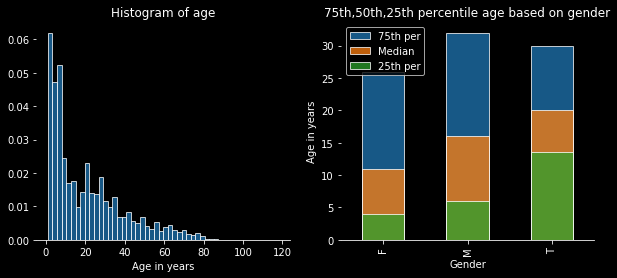

In [8]:
fig,axes = plt.subplots(figsize=(10, 4), nrows=1, ncols=2)
plt.sca(axes[0])
p = plt.hist(df[df['Age'].notnull()]['Age'], 50, normed=1, facecolor=colrcode[0], edgecolor = [1,1,1], alpha=0.75)
plt.title('Histogram of age')
plt.xlabel('Age in years')
prepare_plot_area(plt.gca())

plt.sca(axes[1])
g = df.groupby('Gender')['Age'].quantile(.75)
g2 = df.groupby('Gender')['Age'].median()
g3 = df.groupby('Gender')['Age'].quantile(.25)
g.plot(kind = 'bar',color = colrcode[0],label = '75th per',edgecolor = [1,1,1], alpha=0.75)
g2.plot(kind = 'bar',color = colrcode[1],label = 'Median',edgecolor = [1,1,1], alpha=0.75)
g3.plot(kind = 'bar',color = colrcode[2],label = '25th per',edgecolor = [1,1,1], alpha=0.75)
plt.title('75th,50th,25th percentile age based on gender')
plt.ylabel('Age in years')
plt.xlabel('Gender')
plt.xticks([0,1,2],['F','M','T'])
l = plt.legend(loc='upper left')
prepare_plot_area(plt.gca())

The p value is  0.0


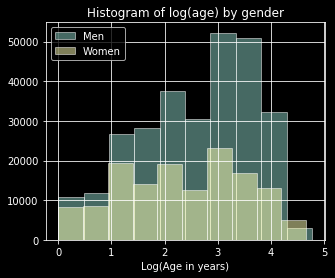

In [9]:
fig = plt.figure(figsize=(5, 4))
np.log(df[(df['Gender']==1)&(df['Age'].notnull())]['Age']).hist(alpha = 0.5,label = 'Men',edgecolor = [1,1,1])
np.log(df[(df['Gender']==0)&(df['Age'].notnull())]['Age']).hist(alpha = 0.5,label = 'Women',edgecolor = [1,1,1])
plt.legend(loc = 'best')
plt.title('Histogram of log(age) by gender')
plt.xlabel('Log(Age in years)') 
## t-test
t,p_val = sp.stats.ttest_ind(np.log(df[(df['Gender']==0)&(df['Age'].notnull())]['Age']),np.log(df[(df['Gender']==1)&(df['Age'].notnull())]['Age']),equal_var = False)
print('The p value is ',p_val)

In [10]:
perM = np.around(df[df['Gender']== 1]['Gender'].sum()/df['Gender'].count()*100,2)
perF = np.around(df[df['Gender']== 0]['Gender'].count()/df['Gender'].count()*100,2)
perT = np.around(df[df['Gender']== 2]['Gender'].count()/df['Gender'].count()*100,2)
print("Percentage man :" , perM )
print("Percentage woman :" , perF )
print("Percentage trans :" , perT )

Percentage man : 66.42
Percentage woman : 33.58
Percentage trans : 0.0


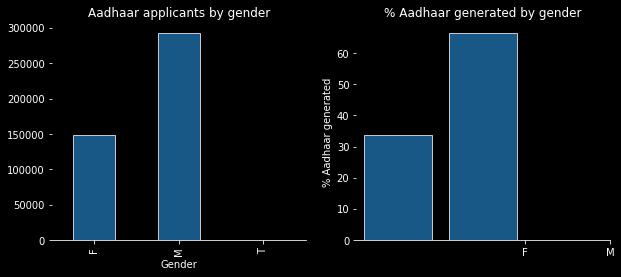

In [11]:
fig,axes = plt.subplots(figsize=(10, 4), nrows=1, ncols=2)
plt.sca(axes[0])
g = df.groupby('Gender')['Generated'].count()
g.plot(kind = 'bar',color = colrcode[0],alpha = 0.75,edgecolor = [1,1,1])
plt.title('Aadhaar applicants by gender')
plt.xticks([0,1,2],['F','M','T'])
prepare_plot_area(plt.gca())
plt.sca(axes[1])
plt.bar(['F','M'],[perF,perM],color = colrcode[0],alpha = 0.75,edgecolor = [1,1,1])
plt.xticks([1.5,2.5],['F','M'])
plt.title('% Aadhaar generated by gender')
plt.ylabel('% Aadhaar generated')
prepare_plot_area(plt.gca())

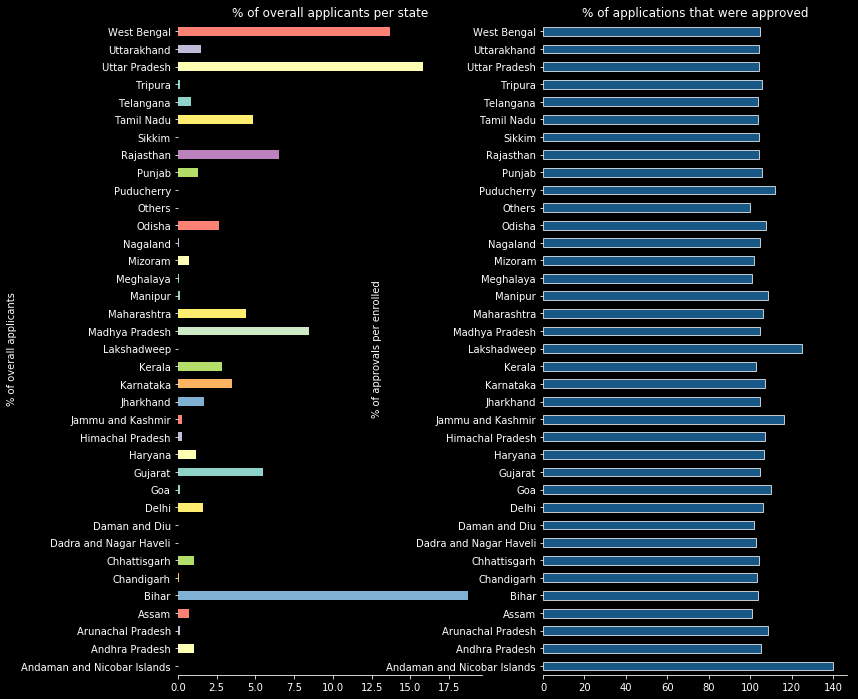

In [12]:
d = df.groupby('State')['Generated'].sum()
c = df.groupby('State')['Generated'].count()
perc_gen_per_state = c/d*100
perc_total =  d/d.sum()*100
fig,axes = plt.subplots(figsize = (12,12),nrows = 1,ncols =2)
plt.sca(axes[0])
perc_total.plot(kind = 'barh')
plt.ylabel('% of overall applicants')
plt.title('% of overall applicants per state')
prepare_plot_area(plt.gca())

plt.sca(axes[1])
perc_gen_per_state.plot(kind = 'barh',color = colrcode[0],edgecolor = [1,1,1],alpha=  0.75)
plt.ylabel('% of approvals per enrolled')
plt.title('% of applications that were approved')
prepare_plot_area(plt.gca())

In [14]:
statesPop = {'Maharashtra':112372972,'West Bengal':91347736,\
              'Tamil Nadu':72138958,'Andhra Pradesh':49386799,\
              'Karnataka':61130704,'Kerala':33387677,'Madhya Pradesh':72597565,\
              'Gujarat':60383628,'Chhattisgarh':135191,'Odisha':41947358,\
              'Rajasthan':68621012,'Uttar Pradesh':207281477,'Assam':31169272,\
              'Haryana':25540196,'Delhi':18980000,'Jharkhand':32966238,\
              'Punjab':27704236,'Bihar':103804637,'Tripura':3671032,'Puducherry':1244464,\
              'Himachal Pradesh':6864602,'Uttarakhand':10116752,'Goa':1457723,\
              'Jammu and Kashmir':12548926,'Sikkim':607688,'Andaman and Nicobar Islands':379944,\
              'Arunachal Pradesh':1382611,'Meghalaya':2964007,\
              'Chandigarh':1055450,'Mizoram':1091014,'Dadra and Nagar Haveli':342853,\
              'Manipur':2721756,'Nagaland':1980602,'Daman and Diu':242911,\
              'Lakshadweep':64429,'Telangana' :35286757}

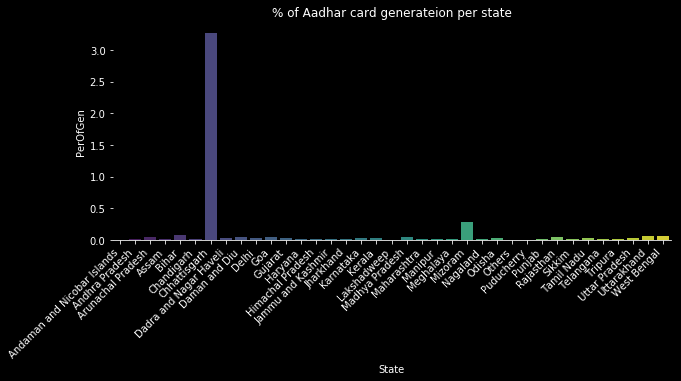

In [15]:
fig = plt.figure(figsize=(10, 4))
g = df.groupby(['State'],as_index=False)['Generated'].sum()

for state in statesPop.keys():
    g.loc[g['State']==state,'Population'] = statesPop[state]
   
g['PerOfGen'] = g['Generated']*100/g['Population']    
sns.barplot(x='State',y='PerOfGen',data=g,palette='viridis')
plt.title('% of Aadhar card generateion per state')
plt.xticks(rotation=45,ha='right')
prepare_plot_area(plt.gca())

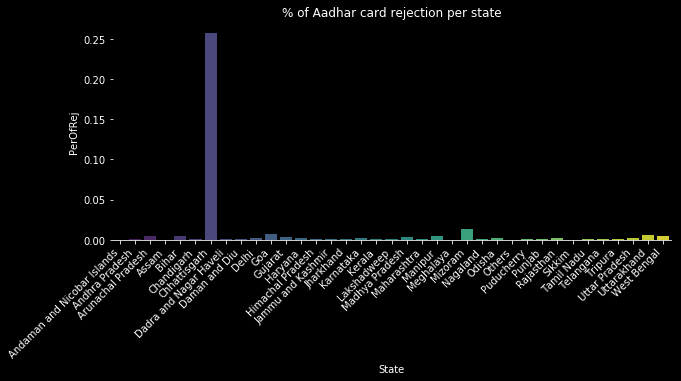

In [16]:
fig = plt.figure(figsize=(10, 4))
g = df.groupby(['State'],as_index=False)['Rejected'].sum()
for state in statesPop.keys():
    g.loc[g['State']==state,'Population'] = statesPop[state]
   
g['PerOfRej'] = g['Rejected']*100/g['Population']    
sns.barplot(x='State',y='PerOfRej',data=g,palette='viridis')
plt.title('% of Aadhar card rejection per state')
plt.xticks(rotation=45,ha='right')
prepare_plot_area(plt.gca())

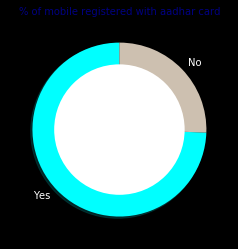

In [17]:
xyz=df['Mobile'].sum() 
cnt=df['State'].count()  
labels=['Yes','No']
data=[xyz,cnt-xyz]
fig = plt.figure(figsize=(5, 4))
plt.pie(data,labels =labels,shadow = True,startangle = 90, autopct='%1.1f%%',colors = ['#00FFFF','#CDC0B0'])
plt.title("% of mobile registered with aadhar card",fontsize=10,color='navy')
centre_circle = plt.Circle((0,0),0.75, fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

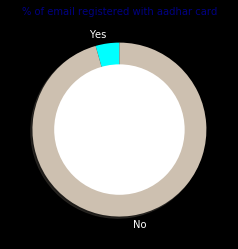

In [18]:
xyz=df['Email'].sum() 
cnt=df['State'].count()  
labels=['Yes','No']
data=[xyz,cnt-xyz]
fig = plt.figure(figsize=(5, 4))
plt.pie(data,labels =labels,shadow = True,startangle = 90, autopct='%1.1f%%',colors = ['#00FFFF','#CDC0B0'])
plt.title("% of email registered with aadhar card",fontsize=10,color='navy')
centre_circle = plt.Circle((0,0),0.75, fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()